![rmotr](https://www.wingoo-solutions.fr/194/105-logo-asi.gif)
<hr style="margin-bottom: 20px;">

# Rapport sur l'accidentalité en france
#### Source: Ministère de l'intérieur sur data.gouv.fr
<hr style="margin-bottom: 20px;">


### Importer les librairies et lecture des fichiers et nettoyage des données

In [2]:
## Librairies utilisées
import pandas as pd
from tabulate import tabulate
import numpy as np
import glob 
import seaborn as sn 
import matplotlib.pyplot as plt
from IPython.display import Image
# Graphe intéractif
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf

# Time series
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib

# Prédiction avec arbres de décision 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


print('Librairies importées')


Librairies importées


##  Récuperation des données

In [3]:
# Fichiers caracteristiques
path_caracteristiques = r'C:\DataSources\caracteristiques' # path to Caracteristique files
all_files_caracteristiques = glob.glob(path_caracteristiques + "/*.csv") # Lister les fichiers contenus dans le path

li_caracteristiques = [] # Initialiser la lister de lécture

for filename in all_files_caracteristiques: # Boucler sur les fichiers en les lisant
    df = pd.read_csv(filename, index_col=None, header=0, encoding = "latin") # Bien spécifier encoding = "latin"
    li_caracteristiques.append(df)

frame_caracteristiques = pd.concat(li_caracteristiques, axis=0, ignore_index=True) # Créer un dataframe à partir de la liste des fichiers lus
nbr_lignes_cara = frame_caracteristiques['Num_Acc'].count()
print(f'======  {nbr_lignes_cara} lignes importées à partir des fichiers de caracteristiques  \n ')
print(tabulate(frame_caracteristiques.head(3), headers='keys', tablefmt='orgtbl'))


# Lecture lieux 
path_lieux = r'C:\DataSources\lieux' # path to Caracteristique files
all_files_lieux = glob.glob(path_lieux + "/*.csv")
li_lieux = []
for filename in all_files_lieux:
    df = pd.read_csv(filename, index_col=None, header=0, encoding = "latin", sep=',', low_memory=False)
    li_lieux.append(df)
frame_lieux = pd.concat(li_lieux, axis=0, ignore_index=True)
nbr_lignes_lieux = frame_lieux['Num_Acc'].count()
print(f'======  {nbr_lignes_lieux} lignes importées à partir des fichiers de lieux  \n ')
print(tabulate(frame_lieux.head(3), headers='keys', tablefmt='orgtbl'))

# Lecture usagers 
path_usagers = r'C:\DataSources\usagers' # path to Caracteristique files
all_files_usagers = glob.glob(path_usagers + "/*.csv")
li_usagers = []
for filename in all_files_usagers:
    df = pd.read_csv(filename, index_col=None, header=0, encoding = "latin", sep=',', low_memory=False)
    li_usagers.append(df)
frame_usagers = pd.concat(li_usagers, axis=0, ignore_index=True)
nbr_lignes_usagers = frame_usagers['Num_Acc'].count()
print(f'======  {nbr_lignes_usagers} lignes importées à partir des fichiers de usagers  \n ')
print(tabulate(frame_usagers.head(3), headers='keys', tablefmt='orgtbl'))




======  958469 lignes importées à partir des fichiers de caracteristiques  
 
|    |      Num_Acc |   an |   mois |   jour |   hrmn |   lum |   agg |   int |   atm |   col |   com | adr              | gps   |         lat |   long |   dep |
|----+--------------+------+--------+--------+--------+-------+-------+-------+-------+-------+-------+------------------+-------+-------------+--------+-------|
|  0 | 201700000001 |   17 |      1 |     11 |   1820 |     5 |     2 |     1 |     1 |     1 |   477 | rue nationale    | M     | 5.05133e+06 | 292191 |   590 |
|  1 | 201700000002 |   17 |      2 |     13 |   1630 |     1 |     2 |     3 |     1 |     3 |     5 | 5 rue sonneville | M     | 5.05361e+06 | 295314 |   590 |
|  2 | 201700000003 |   17 |      3 |      7 |   1150 |     1 |     2 |     9 |     1 |     5 |    52 | rue Jules Guesde | M     | 5.05217e+06 | 288786 |   590 |
======  958469 lignes importées à partir des fichiers de lieux  
 
|    |      Num_Acc |   catr |   voie |   v1 

### Préparation des données

In [4]:
## Nettoyage des donénes

#  Jointure des dataframe lieux et caracteristiques
frame_accident = pd.merge(frame_caracteristiques, frame_lieux, on = 'Num_Acc')

print(f'======  Jointure des fichiers caracteristiques et lieux effectuée ')


# Mise en forme de la date
#### ¨pit avoir toutes les années tout format de quatre charactères. Ex: ( 5 -> 005 -> 05 -> 2005)  , (16 -> 0016, 16 -> 2016)
frame_accident['an01']  = ('00' + frame_accident['an'].map(str) )
frame_accident['an02']  = ('20' + frame_accident['an01'].str[-2:])

#### Pour avoir tout les mois sous format de deux charactères. Ex: ( 1 -> 001 -> 01) , (13 -> 0013 -> 13)
frame_accident['mois01']  = ('00' + frame_accident['mois'].map(str) ) 
frame_accident['mois02']  = ( frame_accident['mois01'].str[-2:] )

## Pour avoir tout les jours sous format de deux charactères. Ex: ( 3 -> 003 -> 03) , (15 -> 0015 -> 15)
frame_accident['jour01']  = ('00' + frame_accident['jour'].map(str) )
frame_accident['jour02']  = ( frame_accident['jour01'].str[-2:] )

## Pour avoir tout les jours sous format de quatre charactères. Ex: ( 3 -> 0003 -> 0003) , (1250 -> 0001250 -> 1250) , (230 -> 000230 -> 0230)
frame_accident['hrmn01']  = ('000' + frame_accident['hrmn'].map(str) )
frame_accident['hrmn02']  = ( frame_accident['hrmn01'].str[-4:] )

# Ajout de la colonne Date
frame_accident['Date'] =  frame_accident['an02'] + frame_accident['mois02'] + frame_accident['jour02'] + frame_accident['hrmn02']
# Changement du type de la colonne
frame_accident['Date'] = pd.to_datetime(frame_accident['Date'] , format='%Y%m%d%H%M')

print(f'======  Mise en forme des date effectué')


# Supression des colonnes inutiles
del frame_accident['an']
del frame_accident['an01']
del frame_accident['an02']
del frame_accident['mois']
del frame_accident['mois01']
del frame_accident['mois02']
del frame_accident['jour']
del frame_accident['jour01']
del frame_accident['jour02']
del frame_accident['hrmn']
del frame_accident['hrmn01']
del frame_accident['hrmn02']
del frame_accident['com']
del frame_accident['adr']
del frame_accident['gps']
del frame_accident['lat']
del frame_accident['long']
del frame_accident['dep']


print(f'======  Supression des colonnes inutilisées')

======  Jointure des fichiers caracteristiques et lieux effectuée 
======  Mise en forme des date effectué
======  Supression des colonnes inutilisées


In [5]:
#  Compter le nombre d'usagers impliqués et morts
frame_usagers['morts'] = frame_usagers['grav'].map(lambda x: 1 if x == 2 else 0 )
frame_usagers['usagers'] = 1
print(f'======  Ajour des colonnes: nombre de morts et nombre d usagers impliqués')


#  Supression des colonnes inutilisées
del frame_usagers['place']
del frame_usagers['catu']
del frame_usagers['sexe']
del frame_usagers['trajet']
del frame_usagers['secu']
del frame_usagers['locp']
del frame_usagers['actp']
del frame_usagers['an_nais']
del frame_usagers['num_veh']
del frame_usagers['etatp']
del frame_usagers['grav']

print(f'======  Supression des colonnes inutilisées')

# Grouper le dataframe selon l'id de l'accident en sommant les valeurs d'usagers impliqués et de morts
frame_usagers = frame_usagers.groupby('Num_Acc' , as_index=False)[['usagers', 'morts']].sum()

print(f'======  Aggrégation du nombre d usagers impliqués et de morts par accident \n')
print(tabulate(frame_usagers.head(3), headers='keys', tablefmt='pretty'))

======  Ajour des colonnes: nombre de morts et nombre d usagers impliqués
======  Supression des colonnes inutilisées
======  Aggrégation du nombre d usagers impliqués et de morts par accident 

+---+--------------+---------+-------+
|   |   Num_Acc    | usagers | morts |
+---+--------------+---------+-------+
| 0 | 200500000001 |    6    |   0   |
| 1 | 200500000002 |    2    |   0   |
| 2 | 200500000003 |    2    |   0   |
+---+--------------+---------+-------+


In [6]:
## Jointure avec le dataframe des accidents
frame_type_accident  = pd.merge(frame_usagers, frame_accident, on = 'Num_Acc')

# Ajout colonne type pour le type d'accident: 1 -> Accident mortel , 0 -> Accident non mortel 
frame_type_accident['Type'] =  frame_type_accident['morts'].map(lambda x: 1 if x > 0 else 0 )

print(f'======  Création du dataframe type_accident effectuée \n')

======  Création du dataframe type_accident effectuée 



In [7]:
print(f'======  Création du dataframe Accident par date et accident par année \n')
AccidentDates = frame_accident['Date']
AccidentByYear = AccidentDates.groupby( [frame_accident['Date'].dt.year.rename('annee')]).agg({'count'})


======  Création du dataframe Accident par date et accident par année 



## Analyse des données

### Analyse descriptive

In [8]:
print(f'======  Valeurs nul dans les données \n')
print(tabulate(pd.DataFrame(frame_accident.isnull().sum()), headers=('colonne', 'val null'), tablefmt='psql'))

======  Valeurs nul dans les données 

+-----------+------------+
| colonne   |   val null |
|-----------+------------|
| Num_Acc   |          0 |
| lum       |          0 |
| agg       |          0 |
| int       |          0 |
| atm       |         73 |
| col       |         19 |
| catr      |          1 |
| voie      |      88911 |
| v1        |     625078 |
| v2        |     919121 |
| circ      |       1574 |
| nbv       |       2731 |
| pr        |     475484 |
| pr1       |     477303 |
| vosp      |       2761 |
| prof      |       1949 |
| plan      |       2281 |
| lartpc    |      56198 |
| larrout   |      54373 |
| surf      |       1924 |
| infra     |       5408 |
| situ      |       4970 |
| env1      |       5440 |
| Date      |          0 |
+-----------+------------+


In [9]:
print(f'======  Quelque statistiques sur les données \n')
#print(frame_type_accident.describe())

======  Quelque statistiques sur les données 



In [10]:
print(f'======  Matrice de corrélation \n')
#print(frame_type_accident.corr())

======  Matrice de corrélation 



In [11]:
print(f'====== évolution du nombre d accidents par année \n')
AccidentByYear_Evolution =pd.DataFrame( {'annee' : AccidentByYear['count'].index , 'count' : AccidentByYear['count'].values})
AccidentByYear_Evolution['évolution'] = AccidentByYear_Evolution['count'].diff()
AccidentByYear_Evolution['évolution %'] = (AccidentByYear_Evolution['count'].pct_change() * 100 ).round(decimals=2)
print(tabulate(pd.DataFrame(AccidentByYear_Evolution), headers='keys', tablefmt='psql', showindex=False))

====== évolution du nombre d accidents par année 

+---------+---------+-------------+---------------+
|   annee |   count |   évolution |   évolution % |
|---------+---------+-------------+---------------|
|    2005 |   87026 |         nan |        nan    |
|    2006 |   82993 |       -4033 |         -4.63 |
|    2007 |   83850 |         857 |          1.03 |
|    2008 |   76767 |       -7083 |         -8.45 |
|    2009 |   74409 |       -2358 |         -3.07 |
|    2010 |   69379 |       -5030 |         -6.76 |
|    2011 |   66974 |       -2405 |         -3.47 |
|    2012 |   62250 |       -4724 |         -7.05 |
|    2013 |   58397 |       -3853 |         -6.19 |
|    2014 |   59854 |        1457 |          2.49 |
|    2015 |   58654 |       -1200 |         -2    |
|    2016 |   59432 |         778 |          1.33 |
|    2017 |   60701 |        1269 |          2.14 |
|    2018 |   57783 |       -2918 |         -4.81 |
+---------+---------+-------------+---------------+


## Analyse prédictive

#### Analyse temporelles

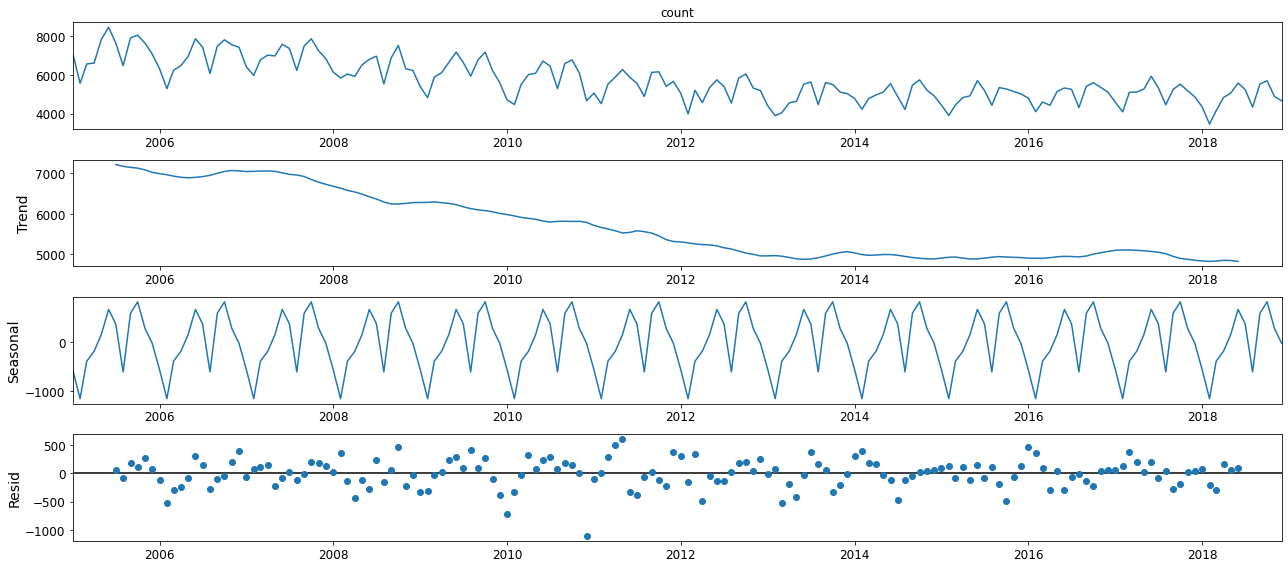

In [12]:
AccidentDates_TimeSeries = AccidentDates.groupby( [frame_accident['Date'].dt.to_period("M")]).agg({'count'})
AccidentDates_TimeSeries = AccidentDates_TimeSeries['count']
AccidentDates_TimeSeries.index = AccidentDates_TimeSeries.index.to_timestamp()
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(AccidentDates_TimeSeries, model='additive')
fig = decomposition.plot()
plt.show()

#### Prédiction

In [13]:
#split dataset in features and target variable
feature_cols = list(frame_type_accident.columns)
feature_cols.remove('Num_Acc')
feature_cols.remove('usagers')
feature_cols.remove('morts')
feature_cols.remove('Date')
feature_cols.remove('env1')
feature_cols.remove('larrout')
feature_cols.remove('lartpc')
feature_cols.remove('pr')
feature_cols.remove('pr1')
feature_cols.remove('v1')
feature_cols.remove('v2')

print(feature_cols)


X = frame_type_accident[feature_cols] # Features
y = frame_type_accident['Type'] # Target variable


# Remplacer les valeurs nul par des zeros
pd.DataFrame(X).fillna(X_test.mean()) # Prendre le MOD


# Les données doivent être numerique, d'ou l'utilisation de cette fonction
X = pd.get_dummies(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test




['lum', 'agg', 'int', 'atm', 'col', 'catr', 'voie', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'Type']


NameError: name 'X_test' is not defined

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=6, criterion = "entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)



In [ ]:


#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Visualisation et reporting

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
AccidentByYear.plot(ax=ax)
plt.title("Nombre d'accidents par année", y=1.013, fontsize=22)
plt.xlabel("Année", labelpad=16)
plt.ylabel("Comme [Accidents]", labelpad=16); 

In [ ]:
AccidentDates_TimeSeries.plot(figsize=(15, 6))
plt.title("Nombre d'accidents par mois", y=1.013, fontsize=22)
plt.xlabel("mois", labelpad=16)
plt.ylabel("Comme [Accidents]", labelpad=16); 
plt.show()

In [ ]:

plt.plot(AccidentByYear_Evolution['annee'], AccidentByYear_Evolution['évolution %'], color='maroon', marker='o', label = 'taux d évolution')
plt.title('taux d evolution du nombre d accident par annee' , fontsize=14)
plt.xlabel('Annee', fontsize=14)
plt.ylabel('Taux d evolution', fontsize=14)

plt.plot([2005, 2018], [0, 0] , color='black')
plt.grid(True)
plt.show()


### Graphe des accidents par mois

c:\python\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



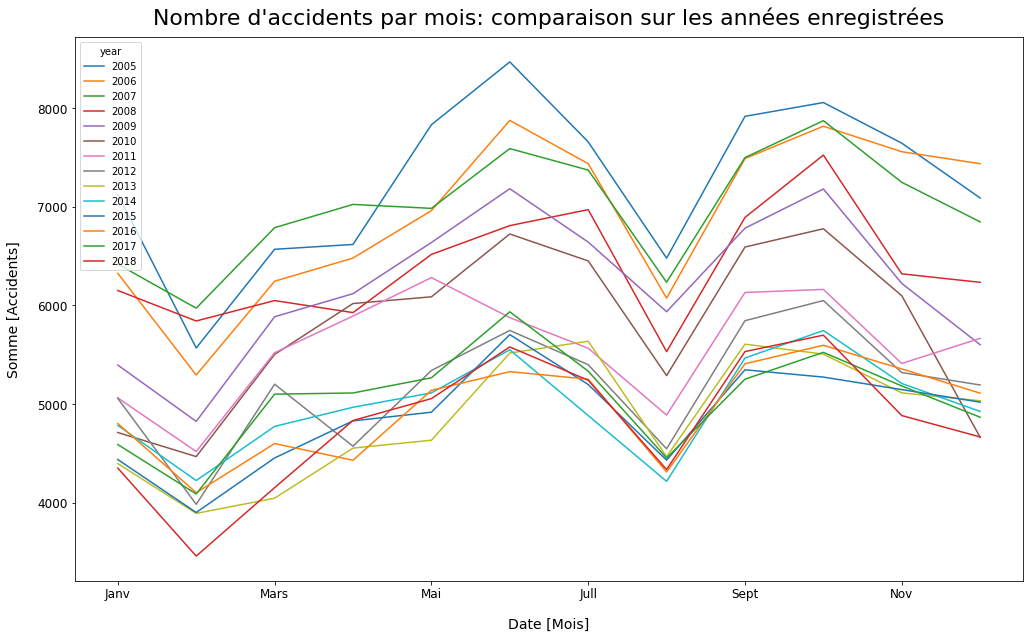

In [15]:
AccidentByMonth = pd.DataFrame({'Date' :  frame_accident['Date']  , 'nbr' : 1})
AccidentByMonth['year_month'] = pd.to_datetime(((AccidentByMonth['Date'].dt.year).map(str) + (AccidentByMonth['Date'].dt.month).map(str)) , format='%Y%m')
AccidentByMonth = AccidentByMonth.groupby('year_month' , as_index=False)['nbr'].sum()
AccidentByMonth['year'] = AccidentByMonth['year_month'].dt.year
AccidentByMonth['month'] = AccidentByMonth['year_month'].dt.month_name()
AccidentByMonth['month_number'] = AccidentByMonth['year_month'].dt.month
alias_mois_ordered = ['Janv', 'Févr', 'Mars', 'Avr', 'Mai', 'Juin', 'Jull', 'Août', 'Sept', 'Oct', 'Nov', 'Déc']
month_en_to_fr_short = {"January": "Janv",
                       "February": "Févr",
                       "March": "Mars",
                       "April": "Avr",
                       "May": "Mai",
                       "June": "Juin",
                       "July": "Jull",
                       "August": "Août",
                       "September": "Sept",
                       "October": "Oct",
                       "November": "Nov",
                       "December": "Déc"
                      }
AccidentByMonth['month'] = AccidentByMonth['month'].map(month_en_to_fr_short)
AccidentByMonth_pivoted = AccidentByMonth.pivot(index='month', columns='year', values='nbr').reindex(alias_mois_ordered)


AccidentByMonth_pivoted.plot(kind='line', figsize=(17, 10))
plt.title("Nombre d'accidents par mois: comparaison sur les années enregistrées", y=1.013, fontsize=22)
plt.xlabel("Date [Mois]", labelpad=16)
plt.ylabel("Somme [Accidents]", labelpad=16);      

#### Exemple de tableau intéractif

In [16]:
# x=(début, fin , step)
# Possibilité de mettre plusiers
@interact(x=(2005,2018,1))
def monthFilter(x=(2005)):
    return AccidentByMonth.loc[AccidentByMonth['year'] > x]  #Apply filter here


'''
Possibilité de filtrer plusieurs colonnes avec le même composant comme suivant
@interact(x=(2005,2018,1))
def monthFilter(column=['year', 'month'], x=(2005)):
    return AccidentByMonth.loc[AccidentByMonth[column] > x]  #Apply filter here

problème l'échelle des deux colonnes est diffèrentes
'''

interactive(children=(IntSlider(value=2005, description='x', max=2018, min=2005), Output()), _dom_classes=('wi…

"\nPossibilité de filtrer plusieurs colonnes avec le même composant comme suivant\n@interact(x=(2005,2018,1))\ndef monthFilter(column=['year', 'month'], x=(2005)):\n    return AccidentByMonth.loc[AccidentByMonth[column] > x]  #Apply filter here\n\nproblème l'échelle des deux colonnes est diffèrentes\n"